#### [ML with Python] 3. 비지도 학습 알고리즘 (1) 데이터 전처리와 스케일 조정
- 본 포스팅은 데이터 전처리와 스케일러 조정에 관한 기본적인 내용에 관하여 다룹니다.
- `StandardScaler`
- `RobustScaler`
- `MinMaxScaler`
- `Normalizer`
- ` QuantileTransform`
    -  when `output_distribution='normal'`
- `PowerTransformer`
    - `yeo-johnson`,  
    - `box-cox`

___

필요 라이브러리 import

In [46]:
import mglearn
import warnings
warnings.filterwarnings(action='ignore') 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

---

<br>

#### <u>여러 가지 전처리 방법</u>

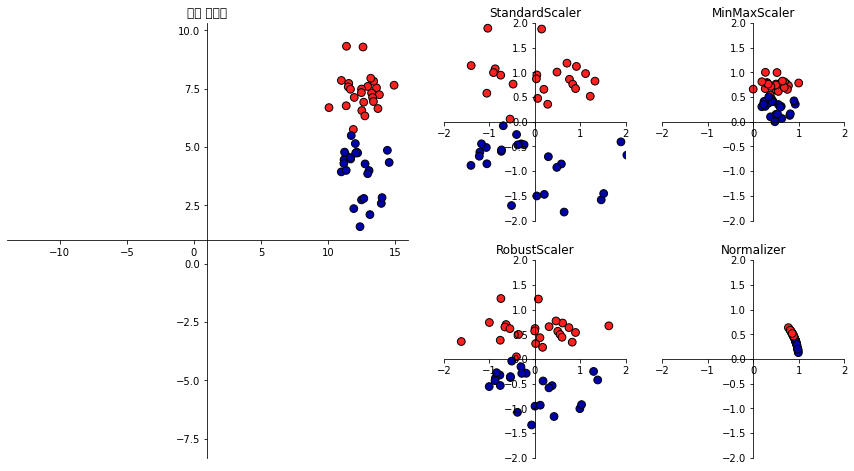

In [4]:
mglearn.plots.plot_scaling()

- `StandardScaler`
    - 각 특성의 <b>평균을 0</b>, <b>분산을 1</b>로 변경하여 모든 특성이 같은 크기를 가지게 한다.
    - 특성의 최솟값과 최댓값 크기를 제한하지 않는다.
    - StandardScaler 공식 : `(x-mean)/std`
- `RobustScaler`
    - 특성들이 같은 스케일을 가지게 한다.<br>(이러한 특징은 통계적 측면에서는 `StandardScaler`와 유사하다.)
    - 평균과 분산 대신 <b>median</b>과 <b>quantile</b>을 사용한다.<br>따라서, <b>outlier</b>의 영향을 받지 않는다.
    - RobustScaler 공식 : `(x−q2)/(q3−q1)`
- `MinMaxScaler`
    - 모든 특성이 정확하게 <b>0과 1 사이</b>에 위치하도록 데이터를 변경한다.
    - MinMaxScaler 공식 : `(x−x_min)/(x_max−x_min)`
- `Normalizer`
    - 특성 벡터의 <b>유클리디안 길이가 1이 되도록</b> 데이터 포인트를 조정한다.<br>(지름이 1인 원에 데이터 포인트 투영)
    - 데이터의 방향(또는 각도)만이 중요할 때 많이 사용한다.
    - Normalizer의 `norm` 매개변수 : l1, l2, max 옵션 제공

<br>

---

#### <u>데이터 변환 적용하기</u>
스케일을 조정하는 `전처리 메서드`들은 보통 `지도 학습 알고리즘`을 적용하기 전에 사용한다.<br>
다음의 예제에서는 cancer데이터셋에 `커널SVM`을 적용하고 데이터 전처리에는 `MinMaxScaler`를 사용할 것이다.

In [6]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


이 데이터셋에는 569(426+143)개의 데이터 포인트가 있고, 각 데이터 포인트는 30개의 측정값으로 이루어져있으며,<br>`train_test_split`결과 426개의 훈련 데이터셋과 143개의 테스트 데이터셋으로 구분되었다.

<br>

다음으로, `MinMaxScaler`를 임포트하고, `MinMaxScaler`의 `fit`메서드를 훈련세트에 적용해준다. 이때, `X_train`만 넘겨주며 `y_train`은 사용하지 않는다. <u>해당 전처리 메서드의</u> `fit`<u>은 훈련 세트에 있는 특성마다 <b>최솟값</b>과 <b>최댓값</b>을 계산한다.</u>

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# y_train을 사용하지 않는다!
scaler.fit(X_train)

MinMaxScaler()

<br>

`fit` 메서드로 학습된 변환설정을 적용하려면, `transform` 메소드를 사용해야한다.

- `fit` : 학습 데이터 셋에서 변환을 위한 기반설정을 fit을 통해 학습시킨다.
- `transform` : fit을 통해 학습시킨 기반설정을 그대로 다른 데이터(ex.테스트 데이터 셋)에 적용시킨다.
- `fit_transform` : fit과 transform을 둘다 쓸 경우 이와 같이 써도 무방하다.

In [12]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


결과를 살펴보면 배열 크기는 원래 데이터와 동일한 것을 확인할 수 있으며, </u>모든 특성의 값은 0과 1사이가 되는 것을 확인할 수 있다.</u> 이러한 `훈련 데이터 셋`으로 학습된 변환을 위한 기반설정을 `SVM`에 적용하려면 `테스트 데이터 셋`에도 똑같이 변환을 적용해야 한다.

In [13]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


하지만, `훈련 데이터 셋`을 `fit`으로 학습시켜 얻은 변환을 위한 기반설정을 `테스트 데이터 셋`에 적용할 경우 최솟값과 최댓값이 0 과 1이 아닌 것을 확인할 수 있다. <u>또한, 일부 특성은 0~1 범위를 벗어났다.</u> 이는 왜냐하면 `scaler`객체가 `(x_train)훈련 데이터 셋`의 데이터를 학습해서 식 자체가 `(x - x_trainmin)/(x_trainmax - x_trainmin)`으로 설정되었기 때문이다. <u>스케일의 크기는 </u>`훈련 데이터 셋`<u>을 기준으로 맞추어야 하기 때문에 결론적으로 정답인 것이다!</u>

<br>

---

#### (scikit-learn 0.19.0) <u>QuantileTransform</u>

-  <b>1000개의 quantile</b>을 이용해서 데이터를 균등하게 분포시킨다. 
- <b>quantile</b>을 이용하는 `RobustScaler`와 똑같이 <b>outlier</b>에 민감하지 않다.
- 전체 데이터를 `MinMaxScaler`와 비슷하게 <b>0과 1사이</b>로 압축시킨다.

make_blobs 데이터셋에 `QuantileTransform`을 적용해보자

In [14]:
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

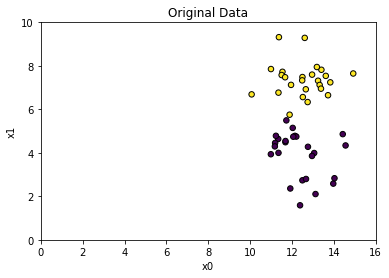

In [16]:
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

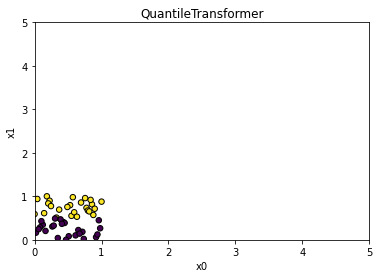

In [17]:
scaler = QuantileTransformer(n_quantiles=50)
# 여기서는 fit_transform을 사용했다는게 또다른 포인트다!
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

초반에 랜덤하게 흩어져 있던 데이터 포인트(위)들이 전처리된 후에는 0과 1사이에 고르게 분포(아래)되어 있는 것을 확인할 수 있다. <u>(X_trans)변환된 데이터를 히스토그램으로 그려보면 균등한 분포를 확인할 수 있다.</u>

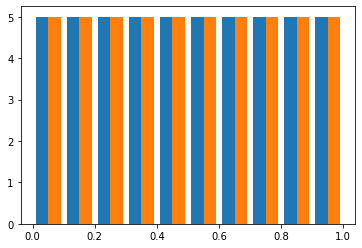

In [18]:
plt.hist(X_trans)
plt.show()

`QuantileTransformer`분위 수는 `n_quantiles` 매개변수에서 설정할 수 있다(기본값 1000).<br>
또한, scaler 객체의 `quantiles_`속성에는 특성별로 계산된 분위 값이 들어 있기에 속성의 크기는 `(n_quantiles, n_features)`이며, `scaler.quantiles_`을 출력하게되면 백분위 순별로 정렬되어 있음을 확인할 수 있다. 정렬된 데이터 셈플의 백분율은 `references_`를 통해서 확인할 수 있다.

In [19]:
print(scaler.quantiles_.shape)

(50, 2)


In [28]:
# 25개중 일부만 출력
print(scaler)
print(scaler.quantiles_[:5],'\n...\n' ,scaler.quantiles_[45:50])

QuantileTransformer(n_quantiles=50)
[[10.07391193  1.58657135]
 [10.99313649  2.10376912]
 [10.99815287  2.36006775]
 [11.18378052  2.58367939]
 [11.19679821  2.73569682]] 
...
 [[13.97634432  7.81956754]
 [14.0329545   7.8525051 ]
 [14.42846765  7.9470731 ]
 [14.563957    9.28640289]
 [14.93027136  9.31872494]]


In [32]:
# 정렬된 데이터 셈플별 백분위 확인
print(scaler.references_.shape)
print(scaler.references_)

(50,)
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


<br>

또한, `QuantileTransformer`는 `output_distribution`매개변수에서 `normal`로 지정하여 균등 분포뿐만 아니라 `정규분포`출력으로 바꿀 수 있다.

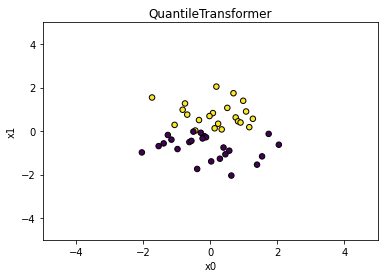

In [33]:
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

<br>

---

#### (scikit-learn 0.20.0) <u>PowerTransformer</u>

앞에서 `StandardScaler`와 `QuantileTransform`의  `output_distribution='normal'` 뿐만 아니라, <br>`PowerTransformer`를 이용하여 `정규분포`형태에 가깝도록 변환해줄 수 있다. <br>`PowerTransformer`는  (기본값)`yeo-johnson`와 `box-cox`알고리즘을 적용할 수 있는 `method`매개변수를 가지고 있다.

<br>

`QuantileTransformer`와 `StandardScaler`, `PowerTransformer`의 두 알고리즘의 차이점을 다음 예제 데이터 셋에서 확인해보면 다음과 같다.

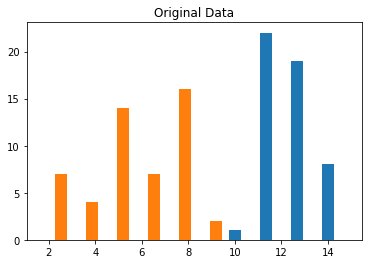

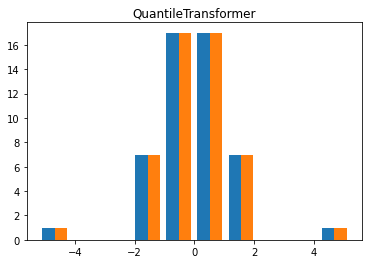

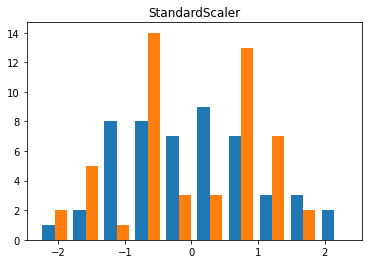

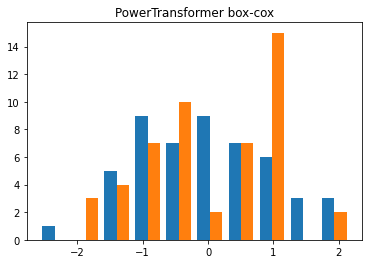

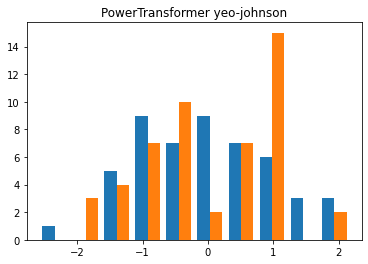

In [34]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(n_quantiles=50, output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

실전에서는 데이터셋마다 어떤 변환이 정규분포에 가깝게 변환할지 사전에 알기 어렵기에 각 변환기의 결과를 히스토그램으로 확인해보는 것이 좋다고 한다.

<br>

---

#### <u>훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기</u>

`지도 학습 모델`에서 `테스트 세트`를 사용하려면,<br> `훈련 세트`<u>와 </u>`테스트 세트`<u>에 같은 변환을 적용해야 한다.</u>

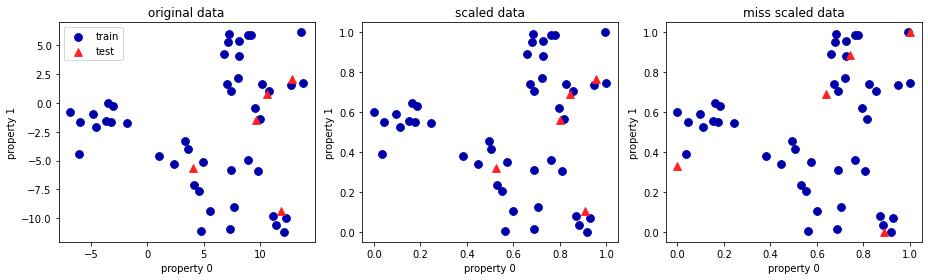

In [37]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="train", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="test", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("original data")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="train", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="test", s=60)
axes[1].set_title("scaled data")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("miss scaled data")

for ax in axes:
    ax.set_xlabel("property 0")
    ax.set_ylabel("property 1")
fig.tight_layout()

각각은 2차원 원본 데이터, 스케일 조정된 데이터, 잘못 조정된 데이터 입니다.<br>세번째 그래프에서 포인트들이 경향성을 무시하고 잘못 배치된 것을 확인할 수 있다.

<br>

---

#### <u>지도 학습에서 데이터 전처리 효과</u>

다시 cancer 데이터셋에서 이를 `MinMaxScaler`로 변환하여 기존 `SVC`결과와 비교해보자.<br>
진행하기 전에 `SVC`는 데이터 특성의 스케일혹은 단위의 영향을 크게 받기 때문에,(`StandardScaler`)모든 특성 값을 평균이 0이고, 단위 분산이 되도록 하거나, (`MinMaxScaler`)0과 1사이로 맞추는 방법을 많이 사용한다는 것을 [상기](https://jhryu1208.github.io/data/2020/11/22/ML_SVM/)시키자.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.94


In [39]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [48]:
# 평균 0, 분산 1을 갖도록 스케일 조정
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


같은 모델을 데이터 스케일 조정함으로 정확도를 올렸습니다. 데이터 스케일 조정은 어려운 과정은 아니지만, 여러 스케일 조정 방법을 적용하기 위해 scikit-learn에서 제공하는 도구를 이용하는 것이 좋습니다.

<br>

---

### References

- 안드레아스 뮐러, 세라 가이도, 『파이썬 라이브러리를 활용한 머신러닝』, 박해선, 한빛미디어(2017)